In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

from sklearn.cluster import KMeans


In [2]:
data=pd.read_csv('Hoodmaps Data - Hackney Ward Age & Income.csv')

In [3]:
data.head()

,Wards in Hackney,Average Age,Average income
0,Brownswood,33.2,"£48,860.00"
1,Cazenove,29.2,"£46,380.00"
2,Chatham,32.1,"£39,570.00"
3,Clissold,33.6,"£56,050.00"
4,Dalston,32.8,"£46,500.00"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
Wards in Hackney    19 non-null object
Average Age         19 non-null float64
Average income      19 non-null object
dtypes: float64(1), object(2)
memory usage: 536.0+ bytes


### income is object datatype so need to change to float

# step 3. Transform data

In [8]:
data.columns =["Ward", "Age","Income"]

In [9]:
data.head()

,Ward,Age,Income
0,Brownswood,33.2,"£48,860.00"
1,Cazenove,29.2,"£46,380.00"
2,Chatham,32.1,"£39,570.00"
3,Clissold,33.6,"£56,050.00"
4,Dalston,32.8,"£46,500.00"


In [25]:
data["Income"]= data["Income"].replace("[£,]","", regex=True).astype(float)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
Ward      19 non-null object
Age       19 non-null float64
Income    19 non-null float64
dtypes: float64(2), object(1)
memory usage: 536.0+ bytes


# Visualize data

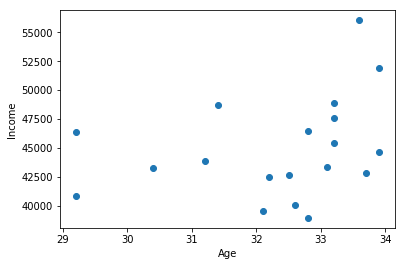

In [33]:
# Create scatter lot of age v/s income
plt.scatter(data.Age, data.Income)
plt.xlabel("Age")
plt.ylabel("Income")

plt.show()

# Clustering
# Step 5 Apply k-means clustering

### We need age and income drop ward

In [36]:
data =  data.drop(["Ward"], axis= 1)

In [37]:
data.head()

,Age,Income
0,33.2,48860.0
1,29.2,46380.0
2,32.1,39570.0
3,33.6,56050.0
4,32.8,46500.0


In [50]:
# create K means model with a number of cluster K, we will leave other argent default
model = KMeans(n_clusters=3, random_state=123)
# need to scale  the data as income is very high value
data_scaled = scale(data)

data_scaled

model.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [64]:

# unscaled data modelling
data_unscale= data
model1 = KMeans(n_clusters=3, random_state=123)
# need to scale  the data as income is very high value

model1.fit(data_unscale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [52]:
# look at the cluster labels for the data points

model.labels_

array([2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1])

In [54]:
# add a columnt o data frame called cluster
data["Cluster"] = model.labels_

In [55]:
data.head()

,Age,Income,Cluster
0,33.2,48860.0,2
1,29.2,46380.0,0
2,32.1,39570.0,1
3,33.6,56050.0,2
4,32.8,46500.0,2


In [56]:
# add a columnt o data frame called cluster
data["Cluster_unscaled"] = model1.labels_

In [57]:
data.head()

,Age,Income,Cluster,Cluster_unscaled
0,33.2,48860.0,2,0
1,29.2,46380.0,0,0
2,32.1,39570.0,1,1
3,33.6,56050.0,2,2
4,32.8,46500.0,2,0


# Step 4. plot the cluster

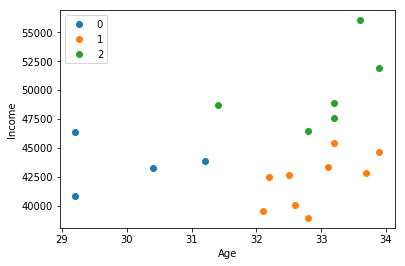

In [58]:
# first group the data using the pandas "groupby" method (c.f. SQL)
# this splits the data into groups based on a variable; here, the Cluster value

groups = data.groupby("Cluster")

# This groupby object is an abstract structure containing: 1) names, 2) groups

# plot the clusters using matplotlib subplots - creates a figure and a subplot. Each group is a separate plot and so
# is plotted with a different colour
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.Age, group.Income, marker = "o", linestyle = "", label = name)
    
plt.xlabel("Age")
plt.ylabel("Income")
ax.legend()

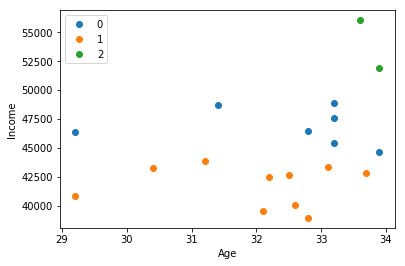

In [60]:
# first group the data using the pandas "groupby" method (c.f. SQL)
# this splits the data into groups based on a variable; here, the Cluster value

groups = data.groupby("Cluster_unscaled")

# This groupby object is an abstract structure containing: 1) names, 2) groups

# plot the clusters using matplotlib subplots - creates a figure and a subplot. Each group is a separate plot and so
# is plotted with a different colour
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.Age, group.Income, marker = "o", linestyle = "", label = name)
    
plt.xlabel("Age")
plt.ylabel("Income")
ax.legend()

In [61]:
model.score(data_scaled)

-11.571827080767168

In [65]:
model1.score(data_unscale)

-52149933.57814431

# Step 7 deterine optimjum number of clusters K
Use the elbow test to compute WSS(within cluster sum of squre errors for different values ok K)



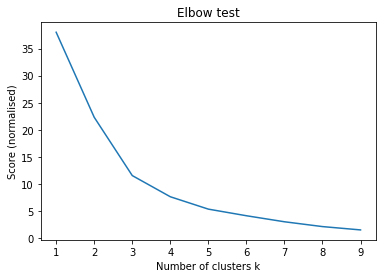

In [77]:
# drop the cluster column, and just look at Age and Income again. Do it in a different way for fun:
data = data[["Age", "Income"]]

# Idea: peform *k*-means clustering for various k, and compute the WSS each time

# create a list of the different values of k to test. Could also use: list(range(1,10))
num_clusters = [1,2,3,4,5,6,7,8,9]

# create a kmeans model for each value of k. Could use a regular for loop, but let's use a "list comprehension"!
kmeans_list = [KMeans(n_clusters = i, random_state=123) for i in num_clusters]

# For each value of k, fit the model with our data and use the "score" method of KMeans to compute the WSS
scores = [-kmeans_list[i-1].fit(scale(data)).score(scale(data)) for i in num_clusters]

# normalise the scores with respect to the score for k=1 
scores_normalised = scores/scores[0]

plt.plot(num_clusters, scores)
plt.xlabel("Number of clusters k")
plt.ylabel("Score (normalised)")
plt.title("Elbow test")
plt.show()

# 3 is optimum K 



try silhoute coeeficient

In [79]:
# DB Scan for categorical data
#K-Modes
#K Median